# Exploring Kidney IgAN  Data (Glomeruli and Tubuli) using PILOT: Unraveling Disease Trajectory and Molecular Changes.

<div class="alert alert-block alert-info">
<b>PILOT</b>

Welcome to the PILOT Package Tutorial for pathomics Data!
 
You can find them [here](https://github.com/CostaLab/PILOT/tree/main/Tutorial/Datasets).

</div>

In [1]:
import PILOT as pl
import scanpy as sc

# Kidney_IgAN Tubuli

### Reading Anndata
<div class="alert alert-block alert-info">
Data is in the Datasets folder.
</div>

In [2]:
adata_T=sc.read_h5ad('Datasets/Kidney_IgAN_T.h5ad') 

### Loading the required information and computing the Wasserstein distance:
<div class="alert alert-block alert-info"> In order to work with PILOT, ensure that your Anndata object is loaded and contains the required information.
    
Use the following parameters to configure PILOT for your analysis (Setting Parameters):
    
adata: Pass your loaded Anndata object to PILOT.
    
emb_matrix: Provide the name of the variable in the obsm level that holds the PCA representation.
    
clusters_col: Specify the name of the column in the observation level of your Anndata that corresponds to cell types or clusters.
    
sample_col: Indicate the column name in the observation level of your Anndata that contains information about samples or patients.
    
status: Provide the column name that represents the status or disease (e.g., "control" or "case").
  
</div>

In [3]:
pl.tl.wasserstein_distance(adata_T,clusters_col='Cell_type',sample_col='sampleID',status='status' 
                           ,data_type='Pathomics')

### Ploting the Cost matrix and the Wasserstein distance:
<div class="alert alert-block alert-info"> 
 Here we show the heatmaps of Cost matrix (cells) and Wasserstein distance (samples).      
</div>

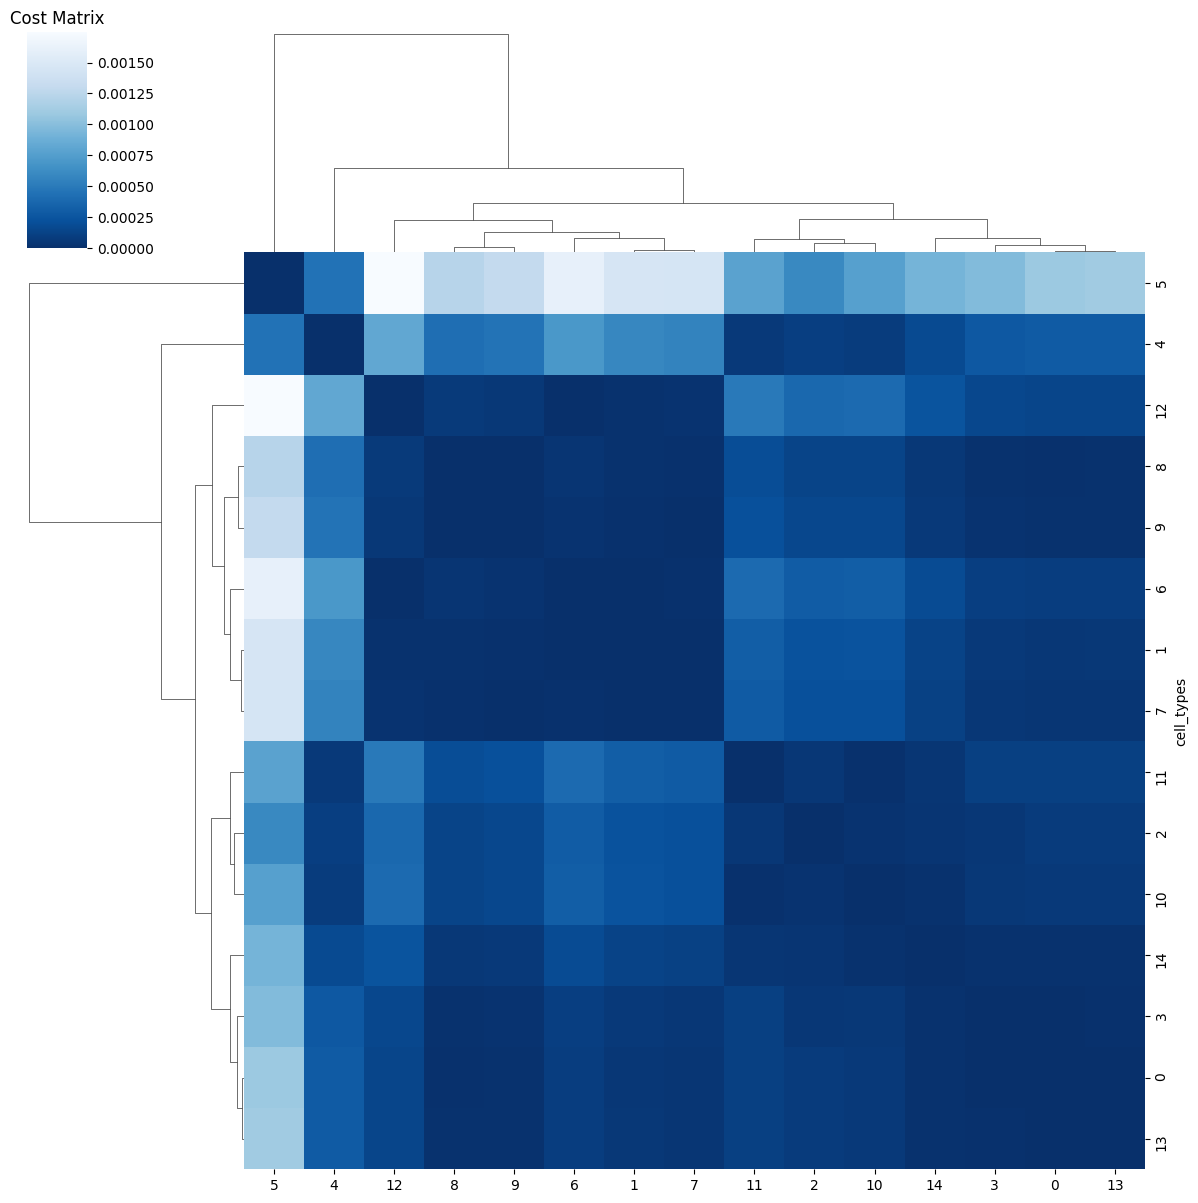

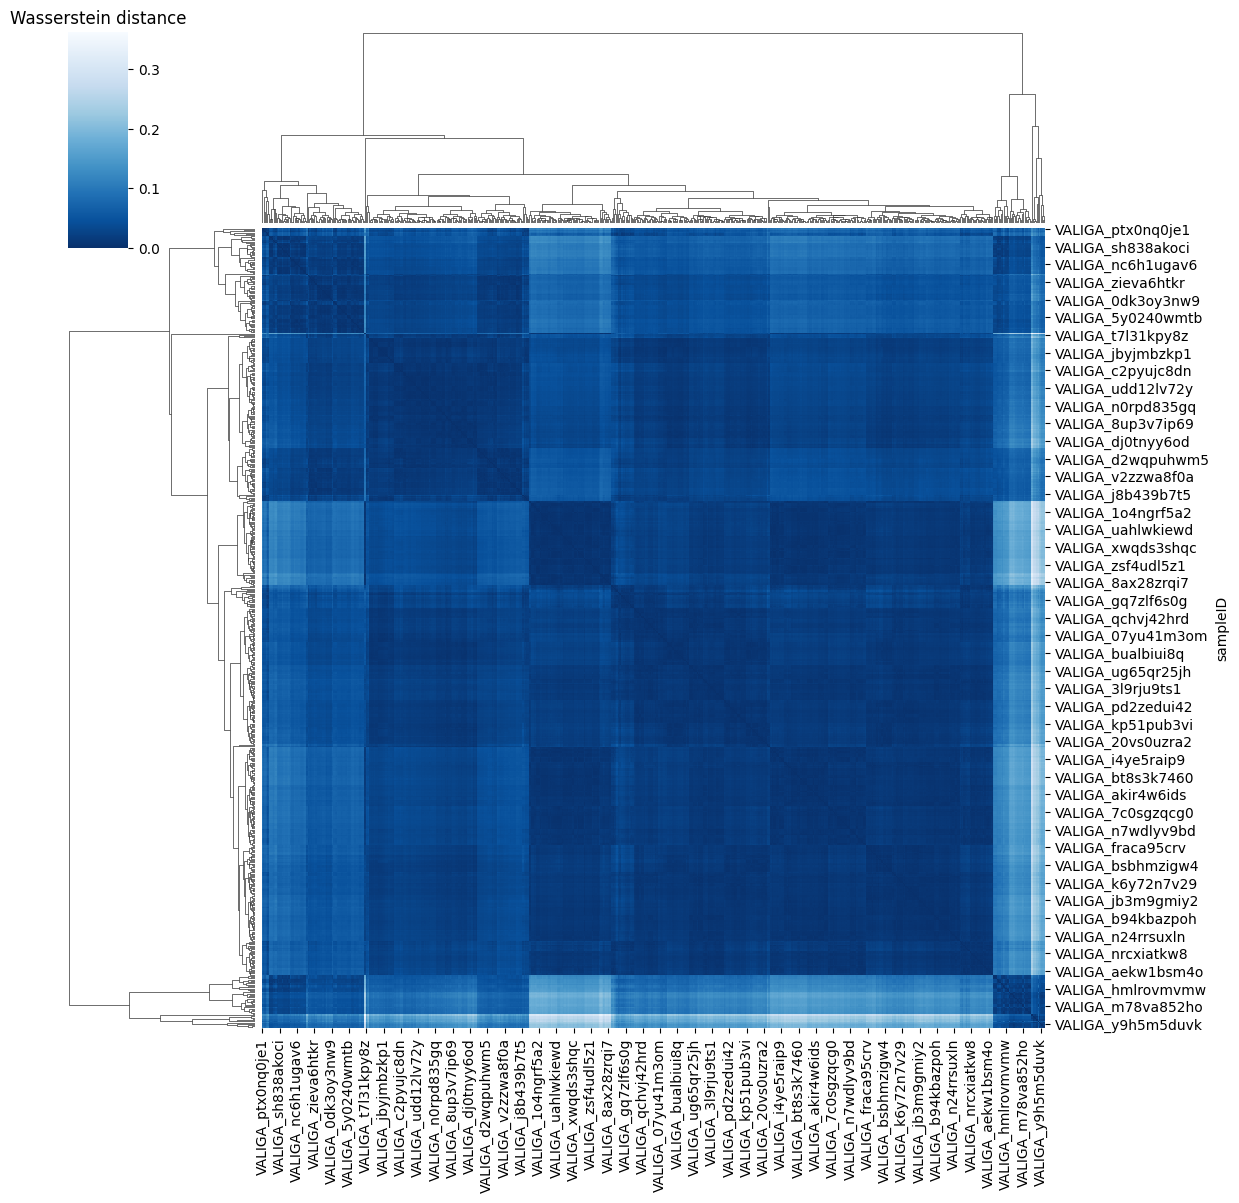

In [4]:
pl.pl.heatmaps(adata_T)

### Trajectory:
<div class="alert alert-block alert-info"> 
 Here we show the Diffusion map of Wasserstein distance.
</div>

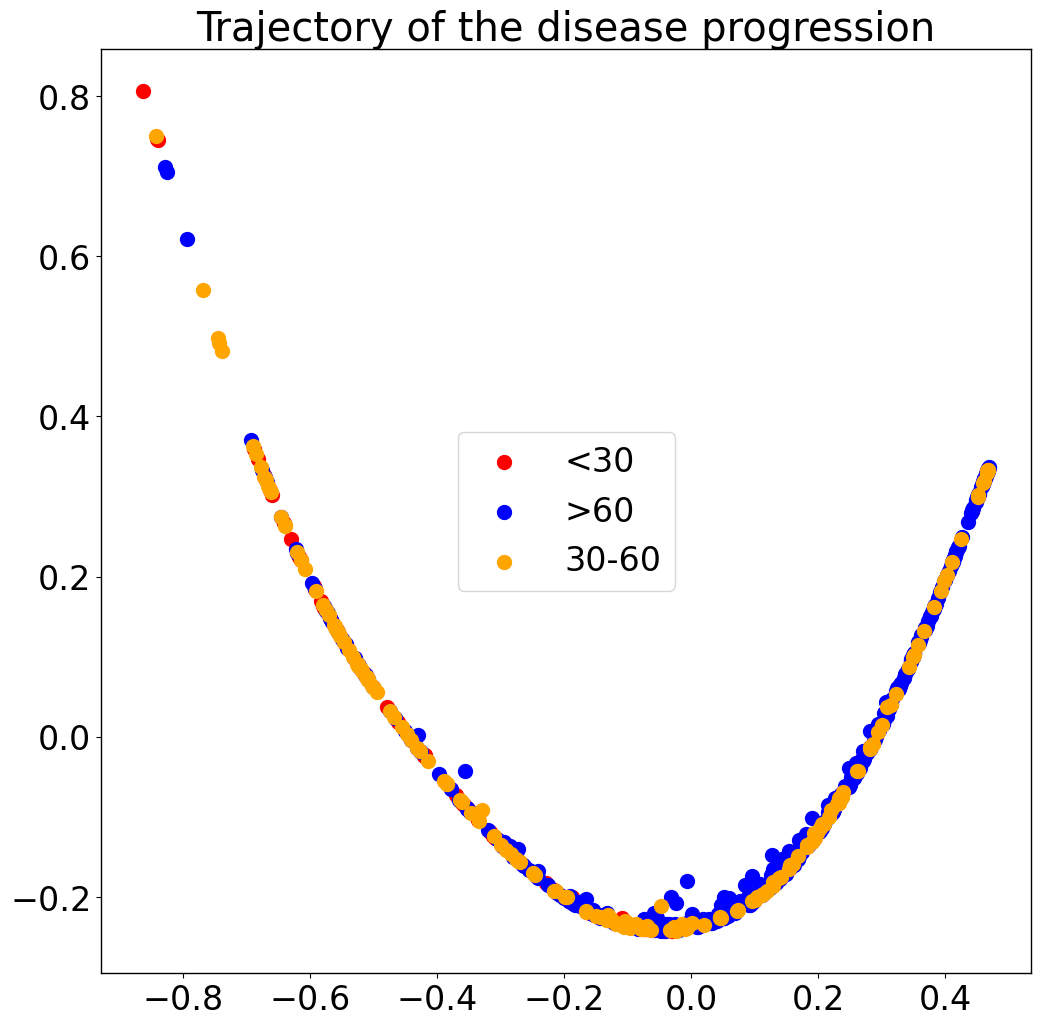

In [5]:
pl.pl.trajectory(adata_T,colors=['red','blue','orange'])

# Kidney_IgAN Glomeruli

### Reading Anndata
<div class="alert alert-block alert-info">
Data is in the Datasets folder.
   </div>

In [6]:
adata_G=sc.read_h5ad('Datasets/Kidney_IgAN_G.h5ad') #First read the object

In [9]:
pl.tl.wasserstein_distance(adata_G,clusters_col='Cell_type',sample_col='sampleID',status='status'
                          ,data_type='Pathomics')

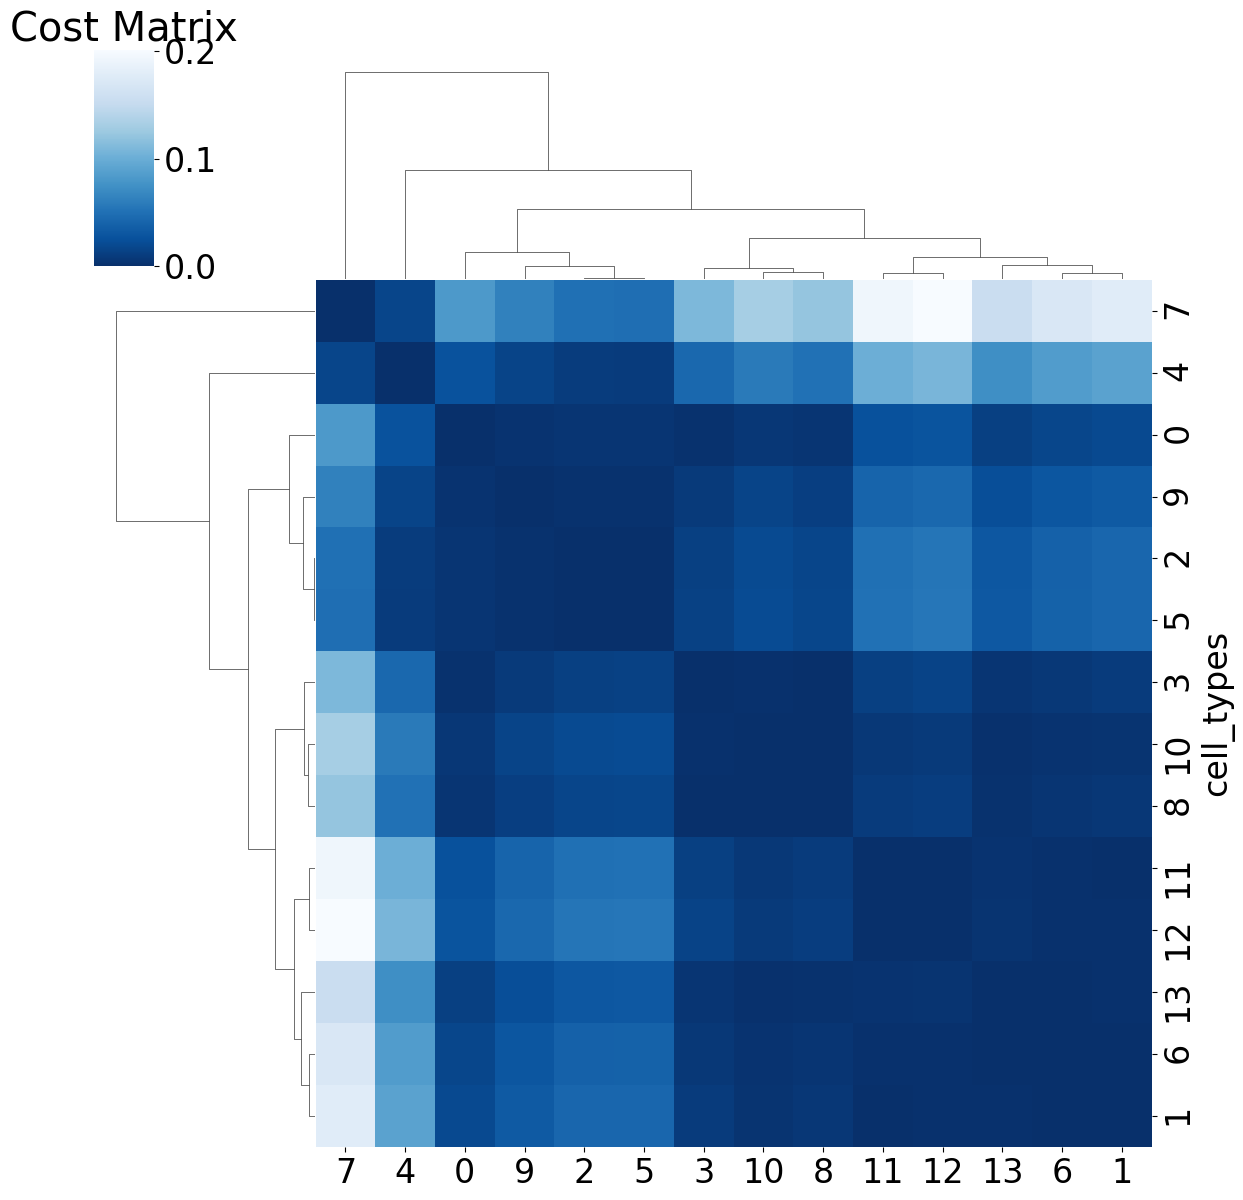

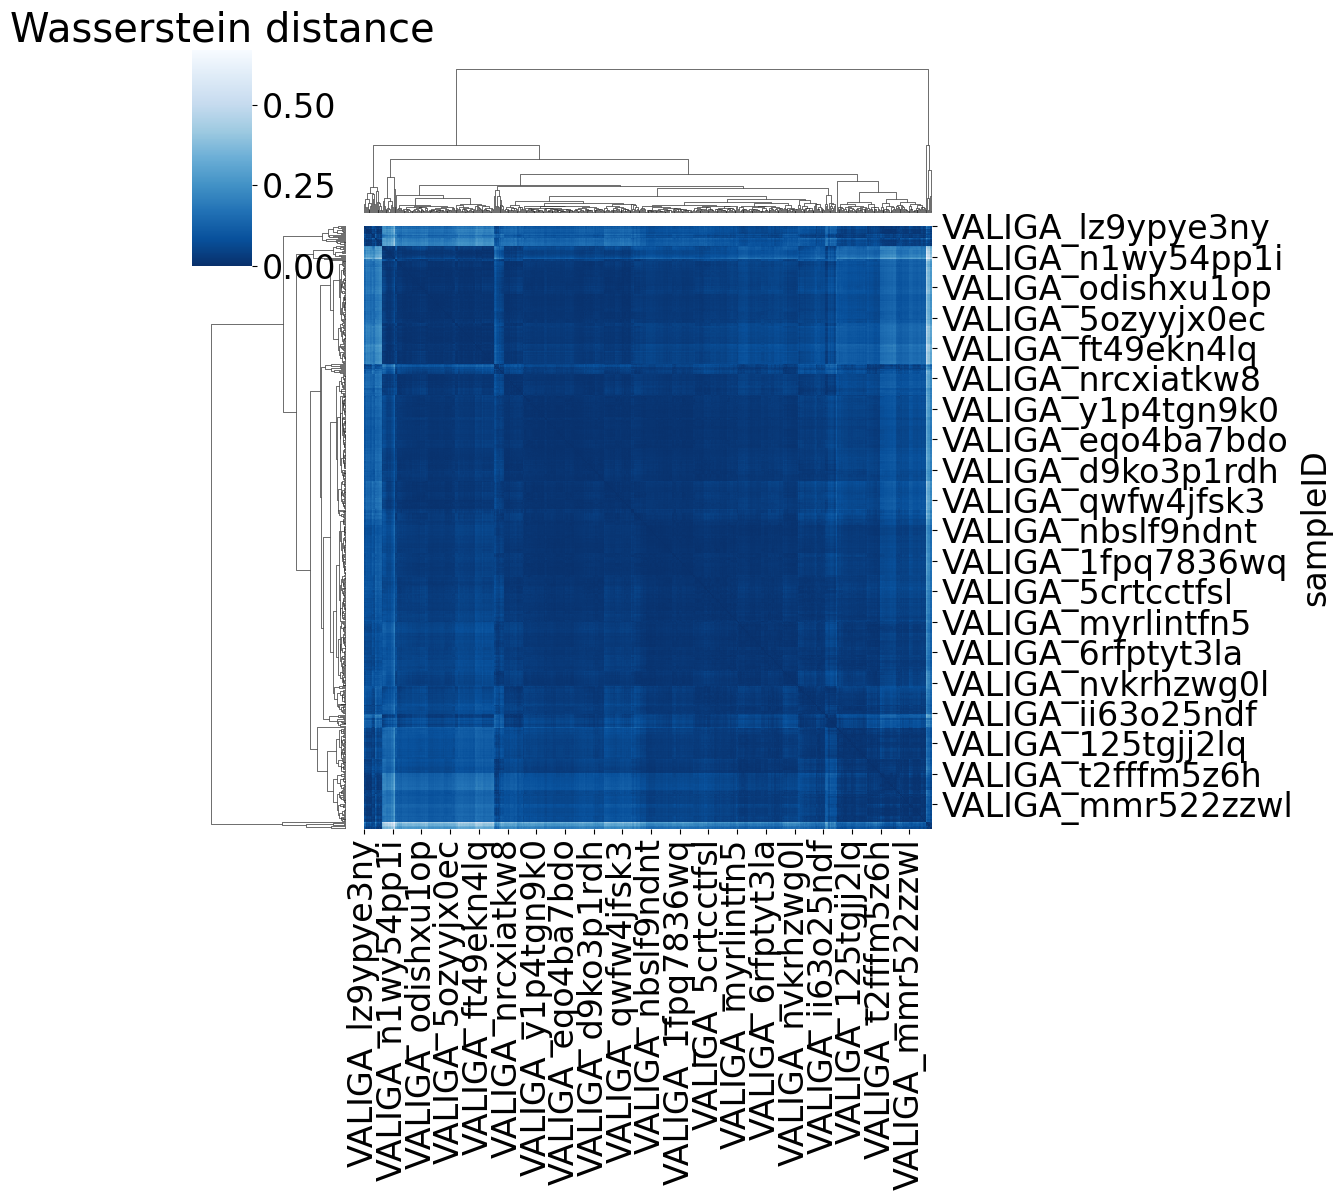

In [10]:
pl.pl.heatmaps(adata_G)

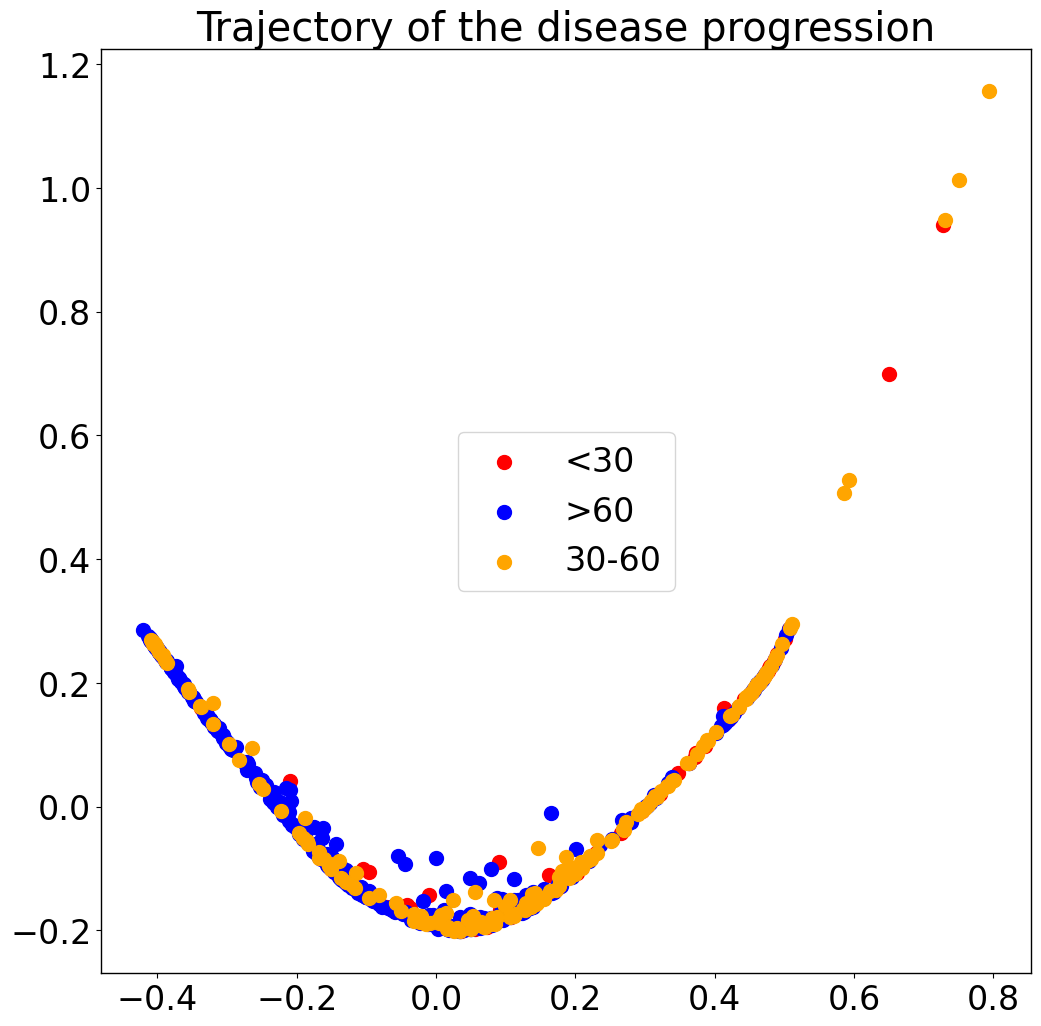

In [11]:
pl.pl.trajectory(adata_G,colors=['red','blue','orange'])

### Combination:
<div class="alert alert-block alert-info"> 
Here, we combine the distances of samples. We get the sum of distances of samples based on Tubuli and Glomeruli distances.   
</div>

In [12]:
adata_Com=adata_G
adata_Com.uns['EMD']=adata_G.uns['EMD']+adata_T.uns['EMD']

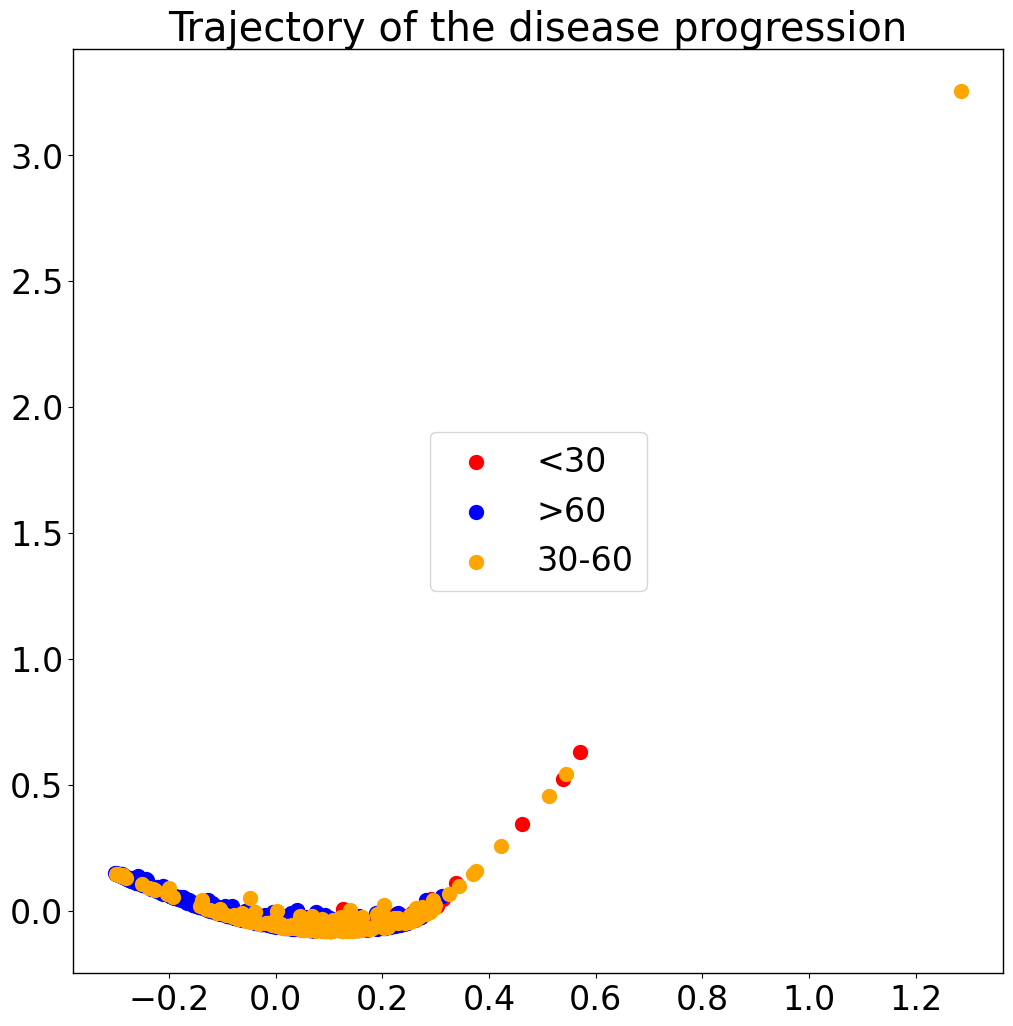

In [18]:
pl.pl.trajectory(adata_Com,colors=['red','blue','orange'])

###  Fit a principal graph:
<div class="alert alert-block alert-info"> 
Drawing the backbone of the trajectory with EIPLGraph.
Here the source_node is important to start ranking samples, simply you can choose the start point from control samples.  It also allows
us to rank samples with a disease progression score t = t1, ...,tn, where tl is the ranking of the sample n
</div>

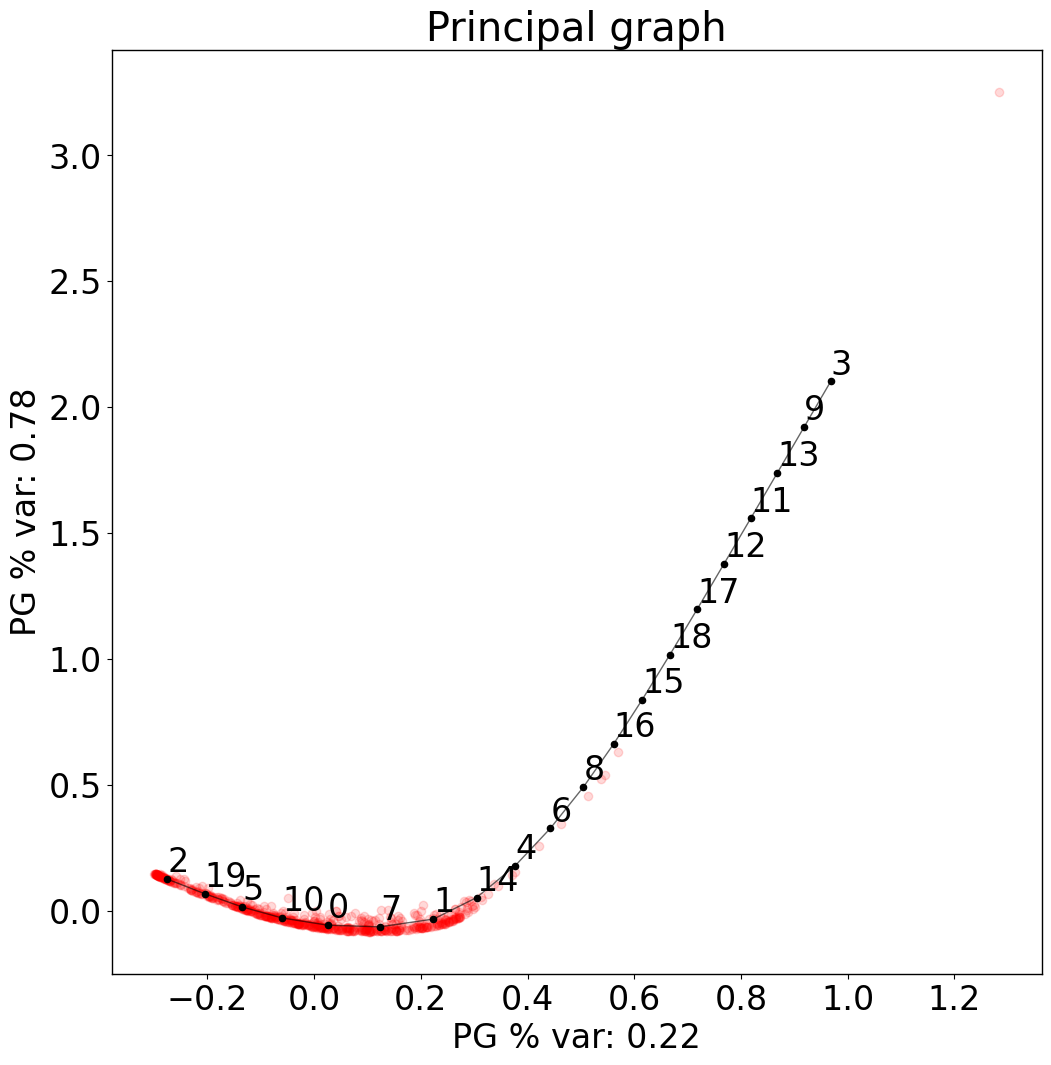

In [19]:
pl.pl.fit_pricipla_graph(adata_Com,source_node=2)

### Cell-type Importance Glomeruli:

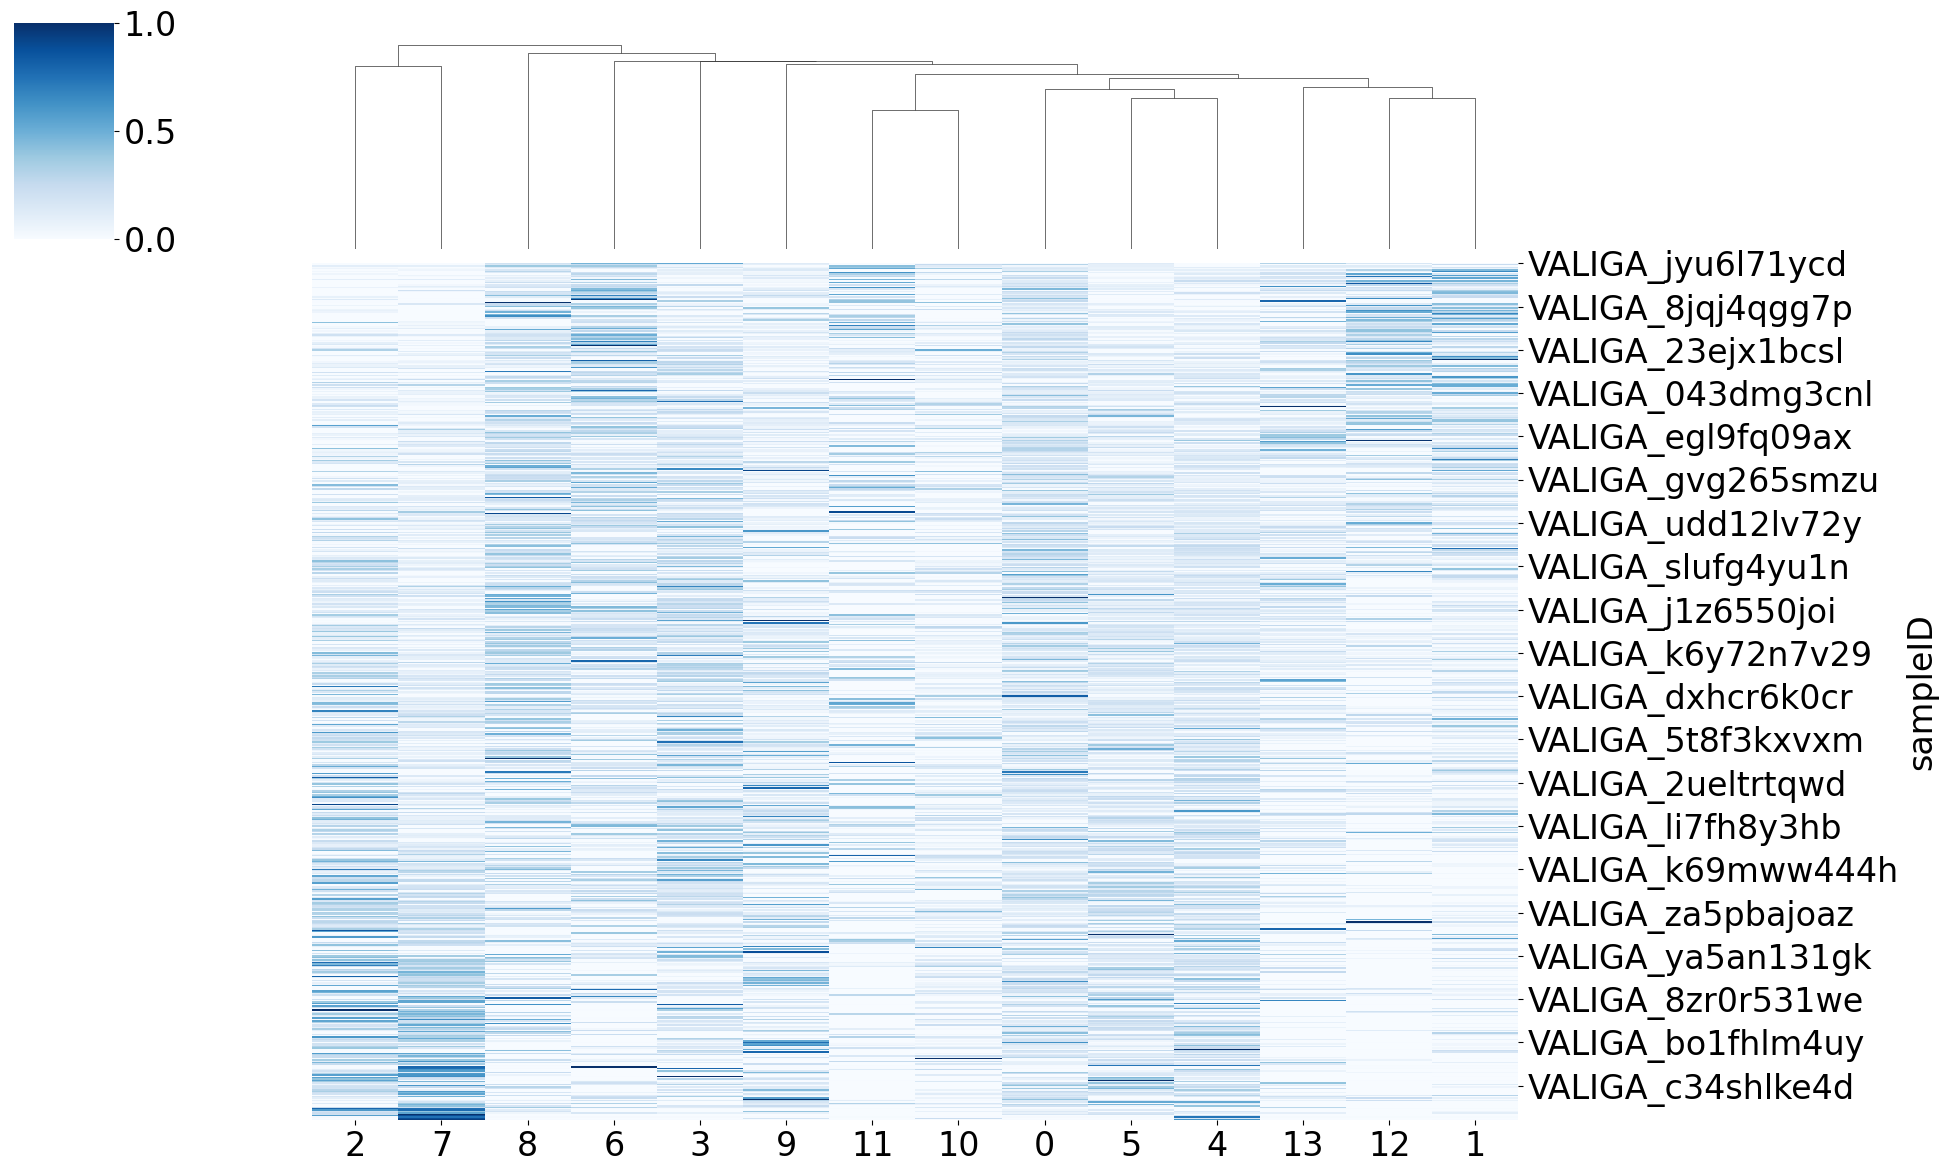

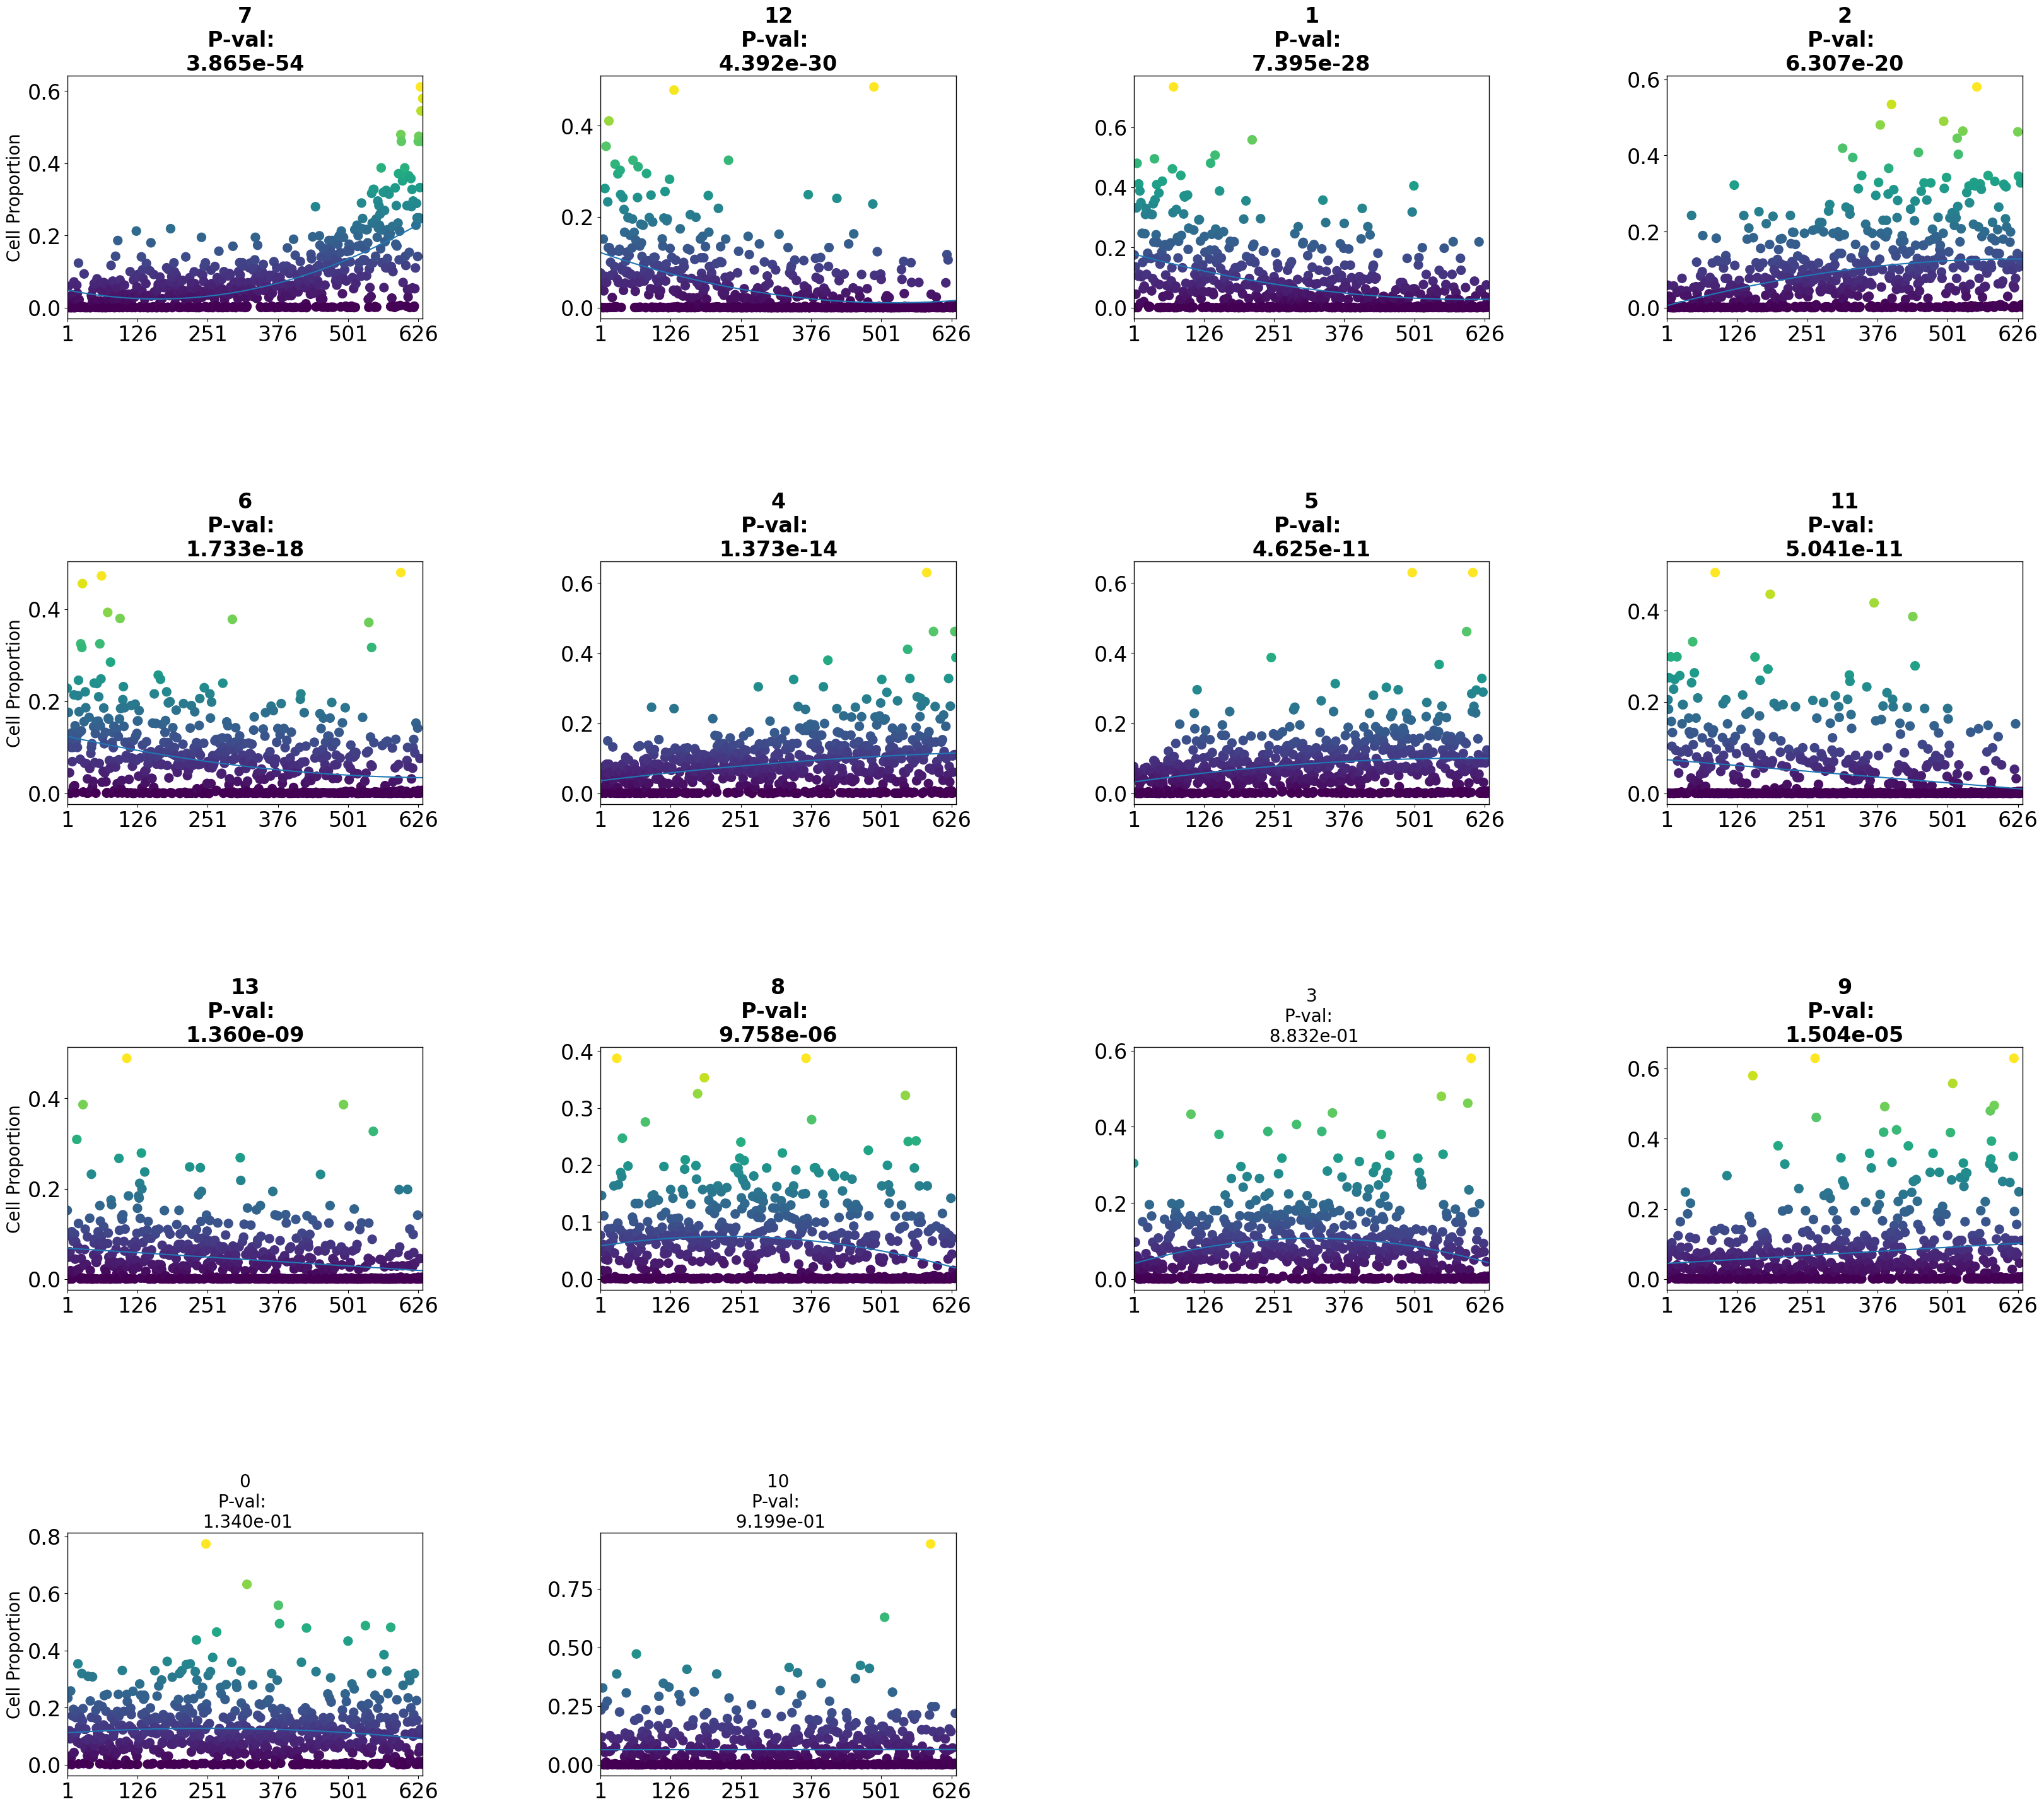

In [20]:
pl.tl.cell_importance(adata_Com,xlim=125)

# Feature selection for Glomeruli based on Combination:

### Saving morphological features and map them with the obtained order by PILOT  (for Glomeruli):

<div class="alert alert-block alert-info"> 
This step extracts features associated with all clusters and map them with the obtained time by PILOT (based on the Trjaectory order of Samples).
    
    
* The function "extract_cells_from_pathomics"  automatically creates a cells folder and put the extracted features associate with cells and obtained time by PILOT(orders).
</div>

In [21]:
pl.tl.extract_cells_from_pathomics(adata_Com)

### Getting the log scale of features 

In [22]:
data=pl.tl.norm_morphological_features(column_names=['glom_sizes',
 'glom_distance_to_closest_glom','glom_diameters','glom_tuft_sizes','glom_bowman_sizes'],name_cell='All')

### Morphological features changes for Glomeruli:

<div class="alert alert-block alert-info">
      
 Firstly, we should note that for pathmocis data, instead of using cluster-specific changes for features/genes (please see MI tutorial analysis), we use the fit models to find the structural changes. 
    
We apply the morphological_features_importance function to catch the features/structures that are changing over the trajectory(combination) for Glomeruli.
</div>

Name of Cluster : All
Sparsity:6.486269746268921e-05
For this cell_type, p-value of  14 genes are statistically significant.
  Expression pattern  count
0        linear down      6
1          linear up      4
2     quadratic down      2
3       quadratic up      2
data saved successfully


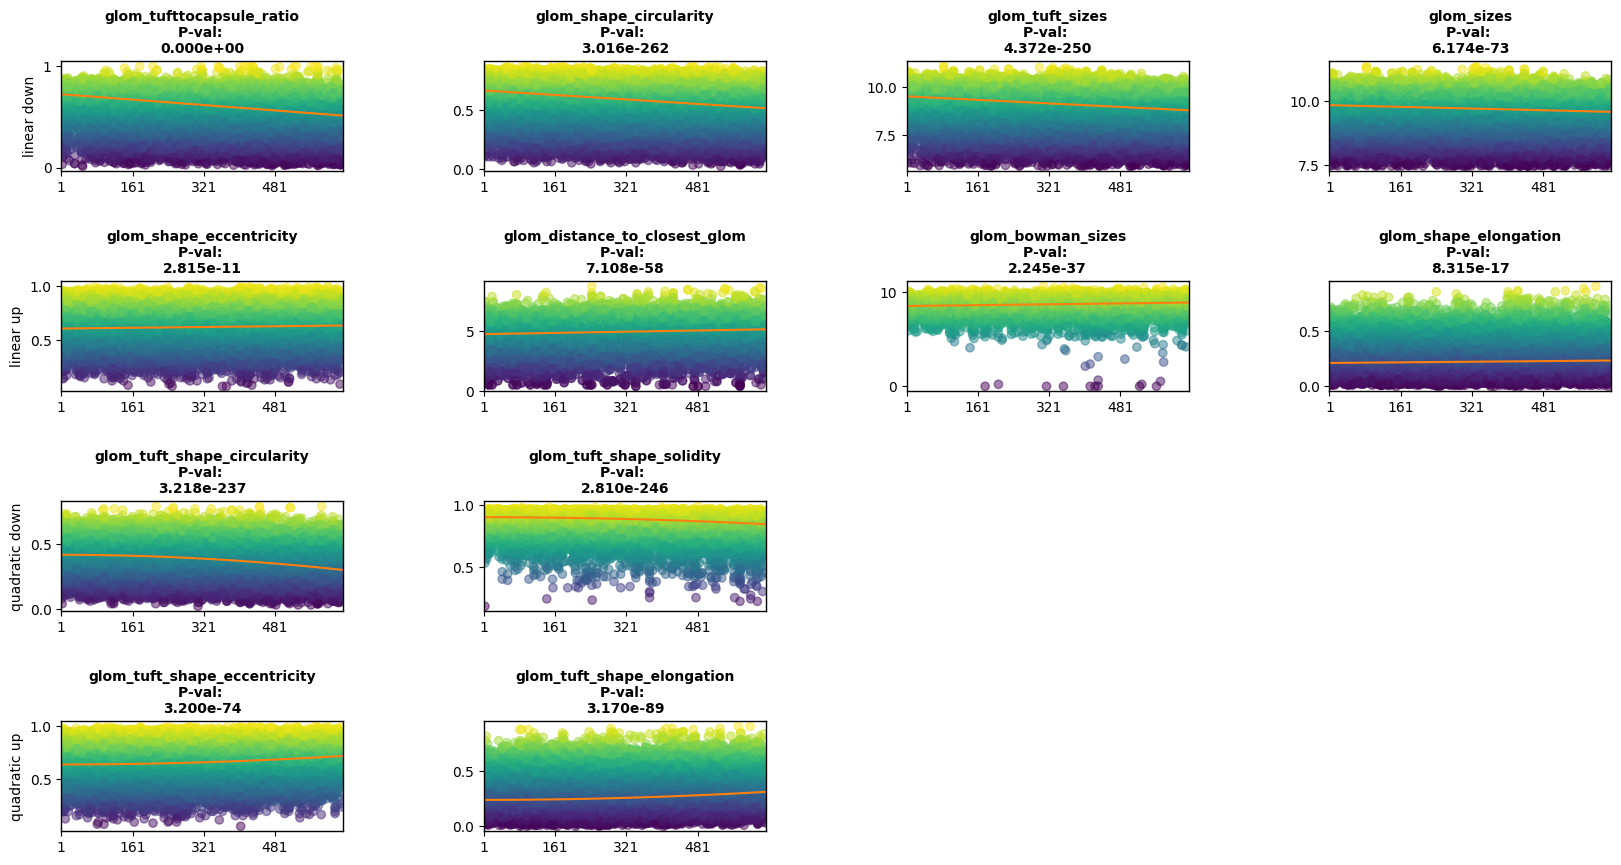

In [23]:
pl.tl.morphological_features_importance(data,height=10,x_lim=160,width=20)    

# Feature slection for Tubuli based on Combination

### Saving morphological features and map them with the obtained order by PILOT  (for Tubuli):


In [24]:
adata_T.uns['orders']=adata_Com.uns['orders']
pl.tl.extract_cells_from_pathomics(adata_T)

### Getting the log scale of features 

In [25]:
data=pl.tl.norm_morphological_features(column_names=['tubule_diameters',
 'tubule_sizes',
 'tubule_distance_to_closest_instance'],name_cell='All')

### Morphological features changes for Tubuli

Name of Cluster : All
Sparsity:0.0
For this cell_type, p-value of  3 genes are statistically significant.
  Expression pattern  count
0        linear down      2
1          linear up      1
data saved successfully


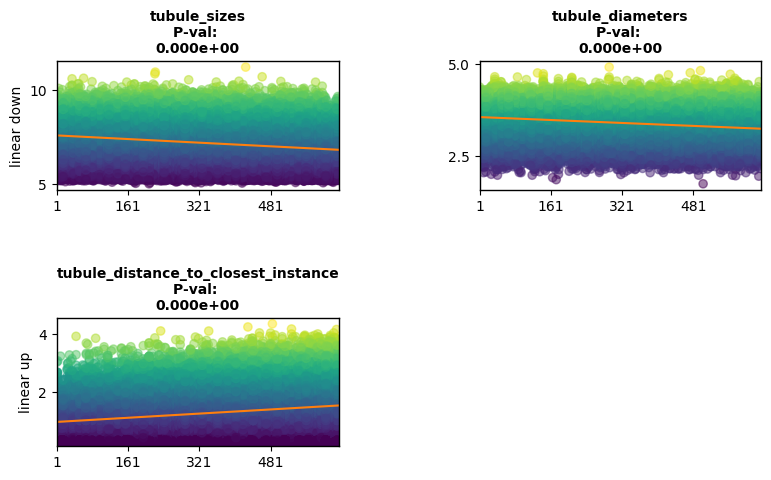

In [26]:
pl.tl.morphological_features_importance(data,x_lim=160,height=5)    